In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h3> <font color= "yellow">Define derivative using f(x+h) - f(x)/h</font></h3>

### 3x²-4x+5

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

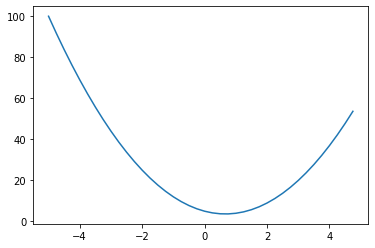

In [7]:
plt.plot(xs, ys)

In [8]:
h=0.000001
x = 3.0
f(x+h)

20.000014000003002

In [9]:
f(x+h) - f(x)

1.4000003002223593e-05

In [10]:
(f(x+h) - f(x))/h

14.000003002223593

<p> <font color= "yellow">More Complex</font></p>

In [11]:
# more complex
# inputs
a = 2.0
b = -3.0
c = 10.0
# single output d
d = a*b + c
print(d)

4.0


<h3> <font color= "yellow">Find derivative of d with respect to a b & c </font></h3>

<p> <font color= "yellow">Effect of a on the output and slope. Notice that differerentiating equation with respect to a, the slope becomes the value of b</font></p>

In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


<p> <font color= "yellow">Effect of b on the slope and ouput. Notice that differerentiating equation with respect to b, the slope becomes the value of a </font></p>

In [13]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0002
slope:  2.0000000000042206


<p> <font color= "yellow">Effect of c on the output and slope. This will just increase the ouput by the value of c</font></p>

In [14]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0001
slope:  0.9999999999976694


<h3> <font color= "yellow">Value class in micrograd</font></h3>

In [68]:
class Value:
    
#  _children is a tuple, then we will convert in to a set, it will help us find the children values
# inititialize _op as an empty set, it will help us find the operation that made the childen value
# we added a labed for visualizing assistance
# a variable that maintains the derivative of L with repect to that value (self.grad=0), initially it will be zero
# so at innitialization we are assuming that every value does not impact the output cuz if the gradient is zero that means that changing this variable is not changing the loss Function L
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
#         prev will be the empty set
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
#     have to use def __add__ to add objects  
# feed in the children of this ._prev value. (self, other) are the children
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '-')
       
    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a * b; e.label='e'
d = a * b + c; d.label='d'
f = Value(-2.0, label='f')
# L is the output of the graph, L is the value of forward pass (-8)
L = f * d; L.label='L'
print(f'a: {a}, b: {b}, c: {c}, d: {d}, e: {e}, f: {f}, L: {L}')

a: Value(data=2.0), b: Value(data=-3.0), c: Value(data=10), d: Value(data=4.0), e: Value(data=-6.0), f: Value(data=-2.0), L: Value(data=-8.0)


In [32]:
d._prev
# {Value(data=-6.0), Value(data=10)} results from a * b and the c value
# {Value(data=-6.0), Value(data=10)} are the children values

{Value(data=-6.0), Value(data=10)}

<h3> <font color= "yellow">Visualization</font></h3>

## Visualize it `Tommy`

In [69]:
from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
          nodes.add(v)
          for child in v._prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
      uid = str(id(n))
      # for any value in the graph, create a rectangular ('record') node for it
      dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
      if n._op:
        # if this value is a result of some operation, create an op node for it
        dot.node(name = uid + n._op, label = n._op)
        # and connect this node to it
        dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
      # connect n1 to the op of n2
      dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot
    

grad is representing the derivative of the output, in this case L, with respect to the value it is attached to

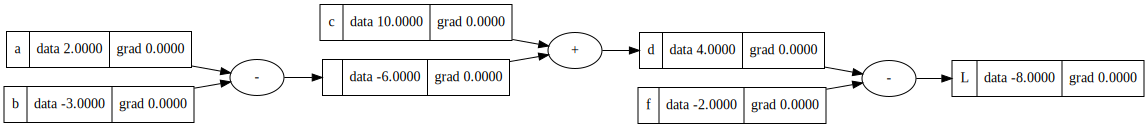

In [70]:
draw_dot(L)